In [1]:
import numpy as np

In [2]:
a = np.array([2.5, 2.6, 2.1, 2.4])
print(a.mean(), a.std())


(2.3999999999999999, 0.18708286933869706)


<center>В этом ноутбуке используются материалы из курса "Введение в машинное обущение" ШАД

<img src="imgs/dino.gif">
<center>Картинка с https://www.autodeskresearch.com/publications/samestats

## Квартет Энскомба

Подробнее, см. [на Википедии](http://en.wikipedia.org/wiki/Anscombe's_quartet).

Наборы данных имеют одинаковое среднее, дисперсию, коэффициент корреляции между признаками. При визуализации на плоскости оказывается, что они имеют принципиально разный характер.

## plt.plot

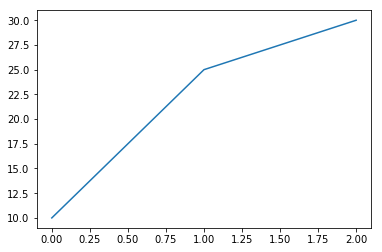

In [4]:
from matplotlib import pylab as plt
plt.plot([10,25,30])
plt.show()

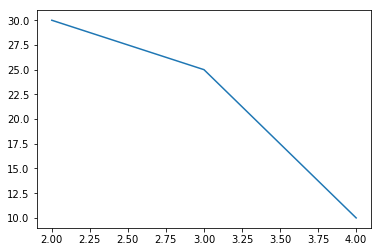

In [4]:
plt.plot([4,3,2], [10,25,30]) 
plt.show()

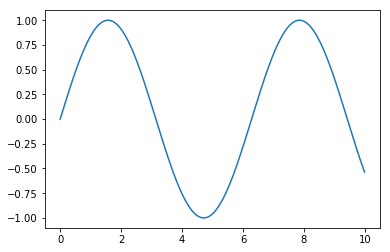

In [5]:
import numpy as np
x = np.arange(0, 10, 0.01)
y = np.sin(x)
plt.plot(x, y)
plt.show()

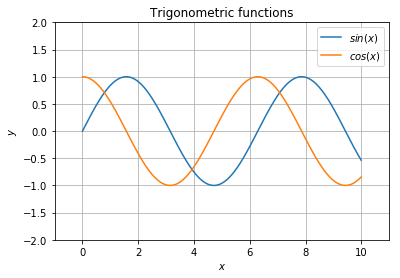

In [8]:
import numpy as np
x = np.arange(0, 10, 0.01)
y = np.sin(x)
plt.axis([-1, 11, -2, 2])
plt.title('Trigonometric functions')
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.plot(x, y, label='$sin(x)$') 
plt.plot(x, np.cos(x), label='$cos(x)$')
plt.legend()
plt.grid()
plt.show()

## plt.hist

In [10]:
import numpy as np

In [11]:
np.random.normal(size=10000)

array([ 0.93073624, -0.07857705, -1.91739046, ..., -0.27372024,
       -1.24138585,  2.16497589])

In [13]:
%matplotlib inline

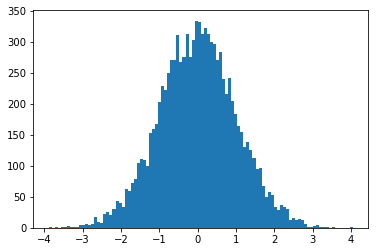

In [12]:
normal_sampling = np.random.normal(size=10000)
plt.hist(normal_sampling, bins=100) 
plt.show()

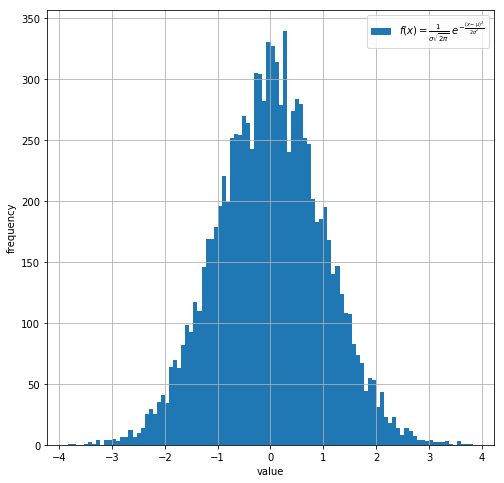

In [9]:
normal_sampling = np.random.normal(size=10000)
plt.figure(figsize=(8, 8))
plt.hist(normal_sampling, bins=100, 
         label=('$f(x)={\\frac {1}{\\sigma {\\sqrt {2\\pi }}}}'
                '\\;e^{-{\\frac {(x-\\mu )^{2}}{2\\sigma ^{2}}}}$'))
plt.legend()
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid()
plt.show()

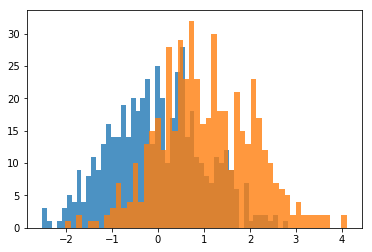

In [10]:
normal_sampling1 = np.random.normal(size=500)
normal_sampling2 = np.random.normal(loc=1, size=500)
plt.hist(normal_sampling1, alpha=0.8, bins=50)
plt.hist(normal_sampling2, alpha=0.8, bins=50)
plt.show()

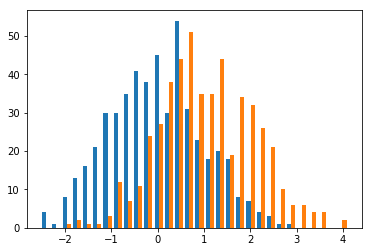

In [11]:
plt.hist([normal_sampling1, normal_sampling2], bins=30)
plt.show()

## plt.scatter

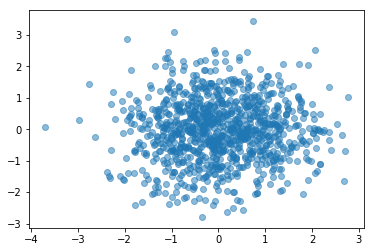

In [12]:
sample_size = 1000
x = np.random.normal(size=sample_size) 
y = np.random.normal(size=sample_size)
plt.scatter(x, y, alpha=0.5)
plt.show()

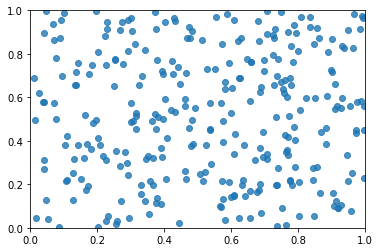

In [13]:
sample_size = 300
x = np.random.uniform(size=sample_size) 
y = np.random.uniform(size=sample_size)
plt.axis([0, 1, 0, 1])
plt.scatter(x, y, alpha=0.8)
plt.show()

## seaborn
Библиотека, расширающая возможности matplotlib.<br>

In [14]:
# !conda install seaborn -y

In [15]:
import seaborn as sns

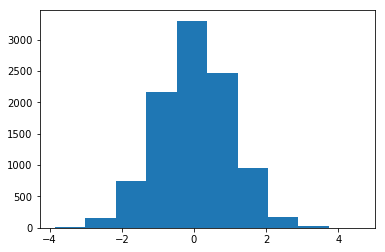

In [16]:
normal_sampling = np.random.normal(size=10000)
plt.hist(normal_sampling) 
plt.show()

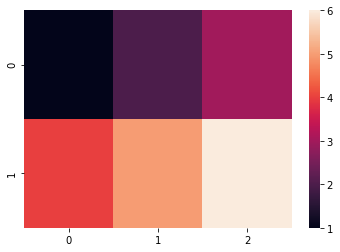

In [17]:
sns.heatmap(np.array([[1,2,3], [4,5,6]]))
plt.show()

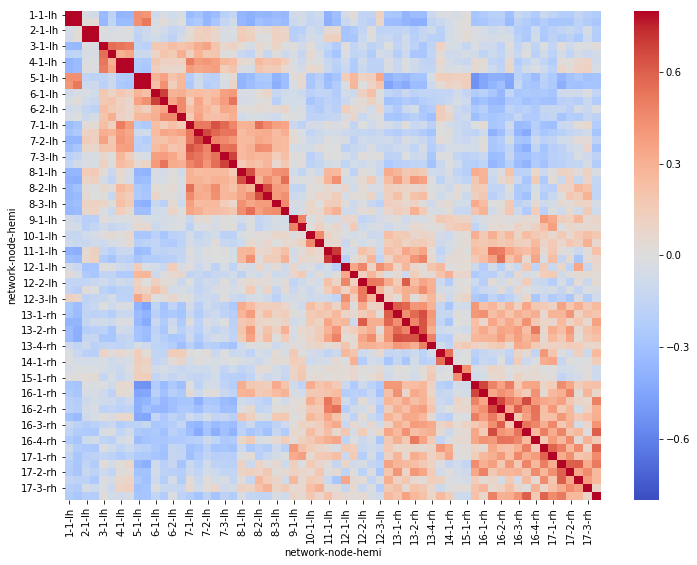

In [30]:
df = sns.load_dataset('brain_networks', header=[0, 1, 2], 
                      index_col=0)
corrmat = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, cmap='coolwarm');
plt.show();

Иногда полезно проводить линии через данные, чтобы лучше понимать зависимости

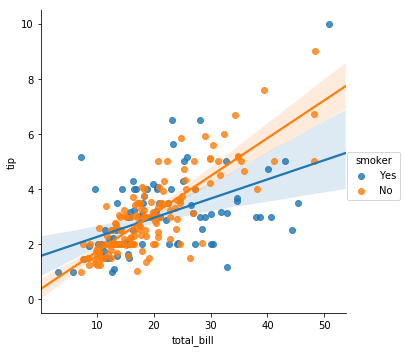

In [36]:
tips = sns.load_dataset('tips')
ax = sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)
plt.show()

## Наборы данных

[Стандартные наборы данных и генераторы в SciKit-Learn](http://scikit-learn.org/stable/datasets/)

In [17]:
from sklearn import datasets
diabetes = datasets.load_diabetes() 
X = diabetes.data

##  Одномерные признаки 

In [18]:
from numpy import random
points = random.choice(X[:, 5], 100)

### Набор точек на прямой

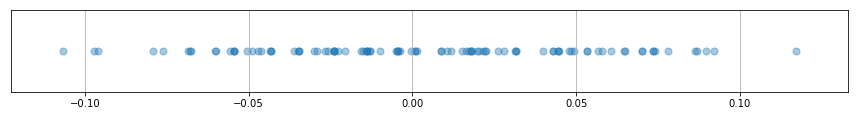

In [19]:
plt.figure(figsize=(15, 1.5)) 
plt.grid(True, axis='x')
plt.yticks([])
plt.scatter(points, np.zeros(len(points)), s=50, alpha=0.4)
plt.show()

### Jitter: случайно выбираем вертикальную координату, чтобы лучше видеть количество точек

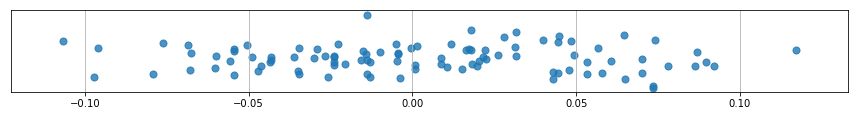

In [21]:
plt.figure(figsize=(15, 1.5)) 
plt.grid(True, axis='x')
plt.yticks([])
plt.scatter(points, np.random.randn(len(points)), 
            s=50, alpha=0.8)
plt.show()

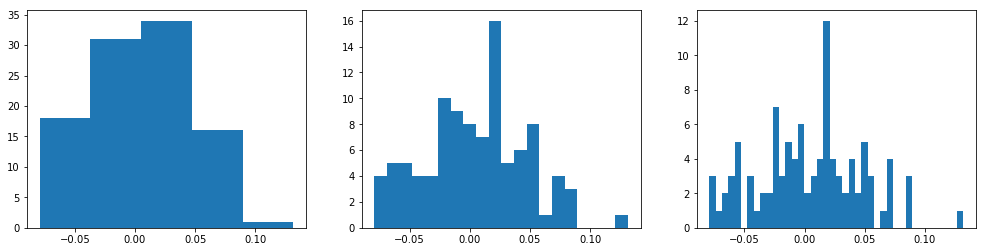

In [41]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1) 
plt.hist(points, bins=5)
plt.subplot(1, 3, 2)
plt.hist(points, bins=20)
plt.subplot(1, 3, 3)
plt.hist(points, bins=40)
plt.show()

###  Логарифмическая шкала

Если данные распределены слишком неравномерно, то можно изображать из на логарифмической шкале

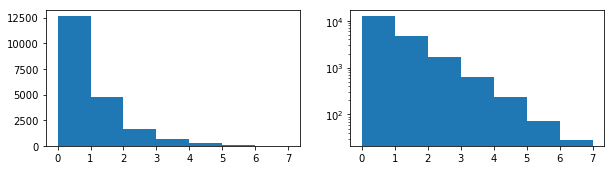

In [75]:
arr = np.random.exponential(1, 20000)

plt.figure(figsize=(10, 2.5))

plt.subplot(1, 2, 1)
plt.hist(arr, bins=range(0, 8, 1))

ax = plt.subplot(1, 2, 2)
plt.hist(arr, bins=range(0, 8, 1))
ax.set_yscale('log')

plt.show()

### 2D-гистограмма

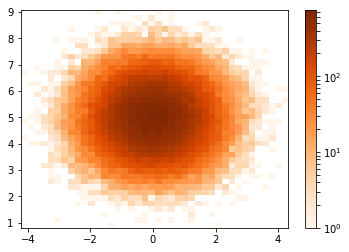

In [43]:
from matplotlib import cm
from matplotlib.colors import LogNorm
x = np.random.randn(100000)
y = np.random.randn(100000) + 5

plt.hist2d(x, y, bins=40, norm=LogNorm(), cmap=cm.Oranges)
plt.colorbar()
plt.show()

### Kernel dinsity estimation 

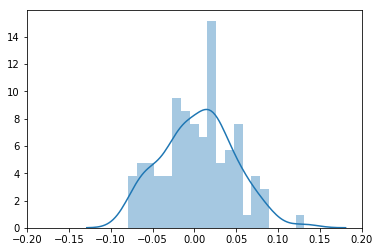

In [44]:
sns.distplot(points, bins=20)
plt.xlim((-0.2, 0.2))
plt.show()

### Последовательности

In [45]:
seq1 = [0.035753708, 0.025425873, -0.02886173, -0.062208079, 0.009859905, -0.029191028, 
        0.015445348, -0.041167612, 0.000661905, 0.022037345, -0.022692465, -0.013708704,
        0.000864697, -0.00381506, 0.00566126, 0.046831302, -0.006634978, 0.034566982, 
        -0.020528213, -0.008776701, -0.025919141, 0.015279487, 0.018577796, -0.014132879, 
        0.036607044, 0.011353209, -0.040542021, -0.022105644, -0.014888368, 0.007026745, 
        -0.011494996, -0.041136038, -0.002631499, 0.024654643, -0.03584061, 0.017303168, 
        0.001725406, 0.004975853, 0.000671759, -0.005891895, -0.013689039, 0.002192959, 
        0.007913215, -0.03852223, 0.007958798, -0.007133473, 0.011234009, -0.001410361]

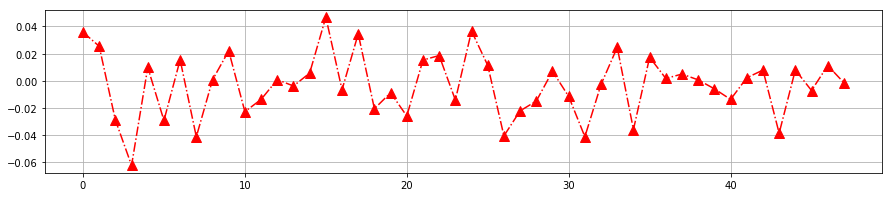

In [76]:
plt.figure(figsize=(15, 3))
plt.plot(seq1, '-.^', markersize=10, c='r')
plt.grid(True)
plt.show()

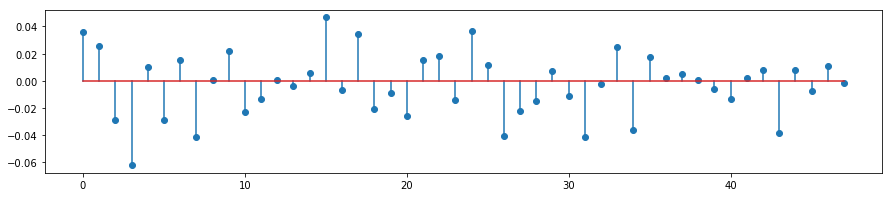

In [47]:
plt.figure(figsize=(15, 3))
plt.stem(seq1)
plt.show() 

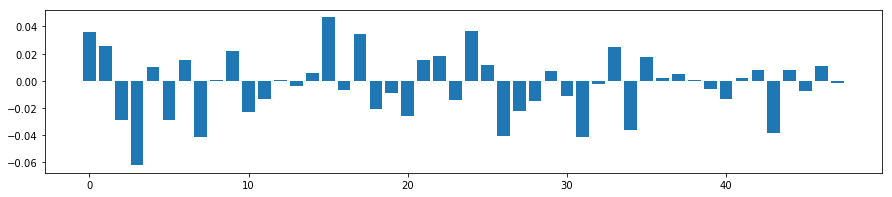

In [48]:
plt.figure(figsize=(15, 3))
plt.bar(np.arange(len(seq1)), seq1)
plt.show()

In [ ]:

1,4,3,5

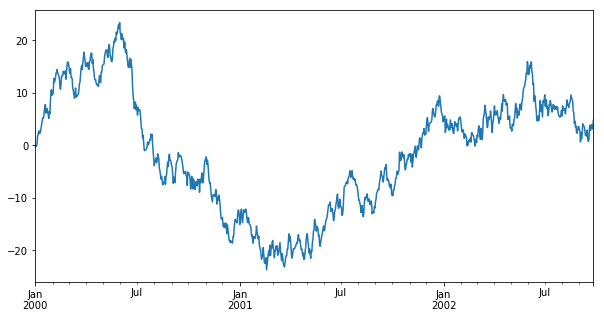

In [29]:
import pandas as pd
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot(figsize=(10,5))

plt.show()

## Ящик с усами (диаграмма размаха)

[Подробнее](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

In [84]:
np.median(np.array([1000, 1,2,4,1000])) 

4.0

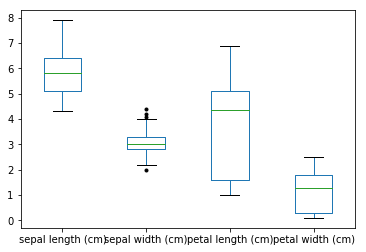

In [31]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'], 
                    columns=iris['feature_names'])
data.boxplot(sym='k.') 
plt.grid(False)
plt.show()

## Scatter Matrix - скаттеры для каждой пары признаков

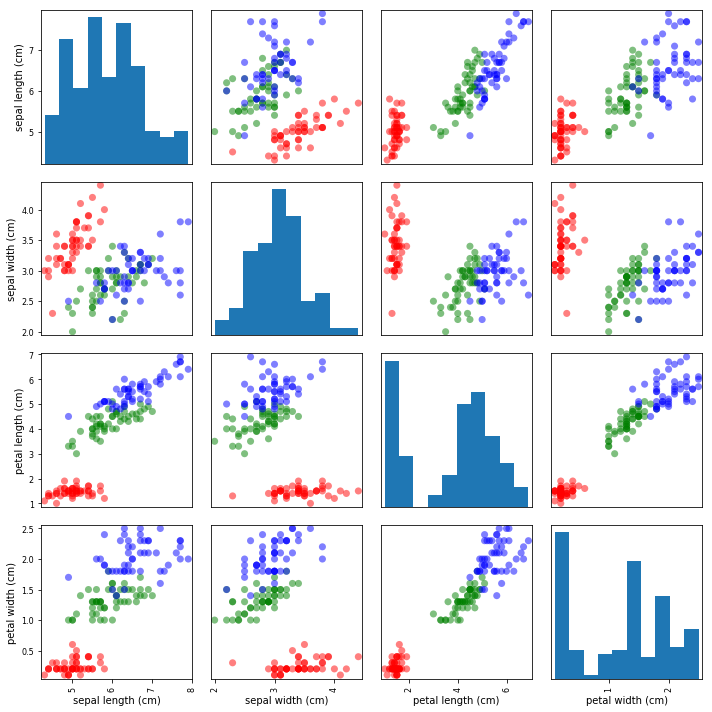

In [51]:
c = ["red", "green", "blue"]
colors = [c[i] for i in iris['target']]

pd.plotting.scatter_matrix(data, grid=True, c=colors, 
                           figsize=(10, 10), s=200)
plt.tight_layout()
plt.show()

### Трехмерный scatter

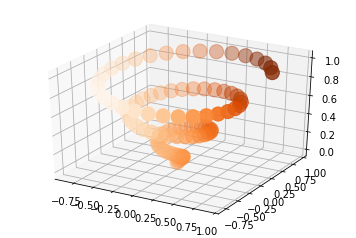

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c, s=200, cmap=cm.Oranges)
plt.show()

## Сохранение картинок

In [53]:
plt.figure(figsize=(10,10))
plt.hist(np.random.randn(1000))
plt.savefig('my_hist.png', format='pdf')

##  Learning curve

Посмотрим как растет качество при увеличении размера обучающей выборки

In [33]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier


digits = load_digits()
X, y = digits.data, digits.target

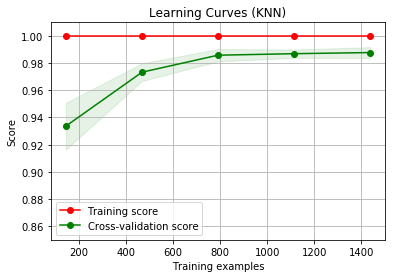

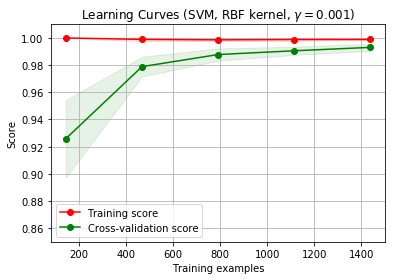

In [34]:
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (KNN)"
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.85, 1.01), cv=cv)

plt.show()

## Сравнение алгоритмов

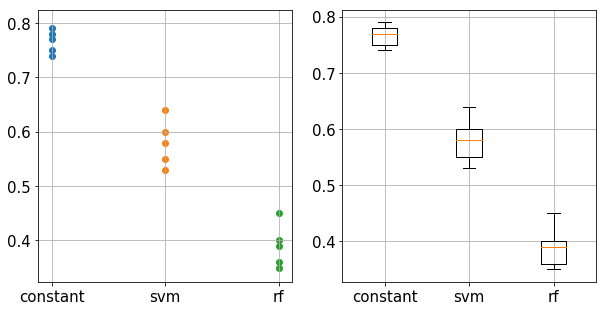

In [56]:
def show_scores(model_names, cv_scores):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for ax in axs:
        ax.set_xticks(np.arange(len(model_names)))
        ax.set_xticklabels(model_names)
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=15)
    for i, (model_name, model_scores) in enumerate(zip(model_names, cv_scores)):
        axs[0].scatter(len(model_scores)*[i], model_scores)
    _ = axs[1].boxplot([model_scores for model_scores in cv_scores])
    axs[1].set_xticklabels(model_names)
    axs[1].tick_params(axis='both', which='major', labelsize=15)

    
model_names = ['constant', 'svm', 'rf']
cv_scores = [
    [0.75, 0.74, 0.78, 0.77, 0.79],
    [0.55, 0.58, 0.53, 0.60, 0.64],
    [0.35, 0.45, 0.4, 0.36, 0.39]
]

show_scores(model_names, cv_scores)
plt.show()

![](http://numeralis.ru/wp-content/uploads/2013/04/17921_574029389282656_1953429470_n.jpg)